## Trabalho Final de Modelos de Regressão

#### Aluno : Renan Lemes Leepkaln

#### Dados utilizados **Medical Cost Personal Datasets**

#### Descrição dos dados 
* age - Idade
* sex - sexo 
* bmi - indice de massa corporal
* children - quantidade de filhos
* smoker - se a pessoa é fumante 
* region - região 
* charges - custos médico associado a cada individuo

#### Situalizando o problema
Temos dados relacionado a um hospital e queremos prever os gastos para gerar um bom controle e uma administração melhor com base nas colunas do dataframe.


#### Modelo utilizado
##### definida por :
$$
    g(\mu_i) = \beta_0 + \beta_1 x_{ji} + \beta_2 x_{i2} + ... + \beta_p x_{ip}
$$
* $g(\cdot)$ é a função ligação
    * $g(\mu) = \mu_i^{-1}$ função inversa (ligação canonica)
    * $g(\mu) = log(\mu_i)$ função logaritimica (efeitos multiplicativos)
    * $g(\mu) = \mu_i$ função identidade (efeitos aditivos)
* $\mu$ é a média da distribuição de gammma
* $\beta_0, \beta_1 ..., \beta_p$ são coeficientes do modelo 
* $x_1, x_2, ..., x_p$ são os preditores do modelo

In [80]:
## libs para tratar os dados
import pandas as pd 
import numpy as np

## libs para plotar graficos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [113]:
## Libs para rodar os modelos
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Processamento dos dados 

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Notei que temos smoker region e sex para transformar em dummy

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df_dummy = pd.get_dummies(df, columns=["sex", "smoker", "region"])

df_dummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [10]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   bool   
 5   sex_male          1338 non-null   bool   
 6   smoker_no         1338 non-null   bool   
 7   smoker_yes        1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


Como visto antes não necessitamos fazer nenhuma alteração nos dados sem valores faltantes e sem valores vazios.

#### Análise descritiva 

In [11]:
df_dummy.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
plt.style.use("default")

In [13]:
size = [len(df["sex"][df.sex == "male"]), len(df["sex"][df.sex == "female"])]
labels = ['male', 'female']


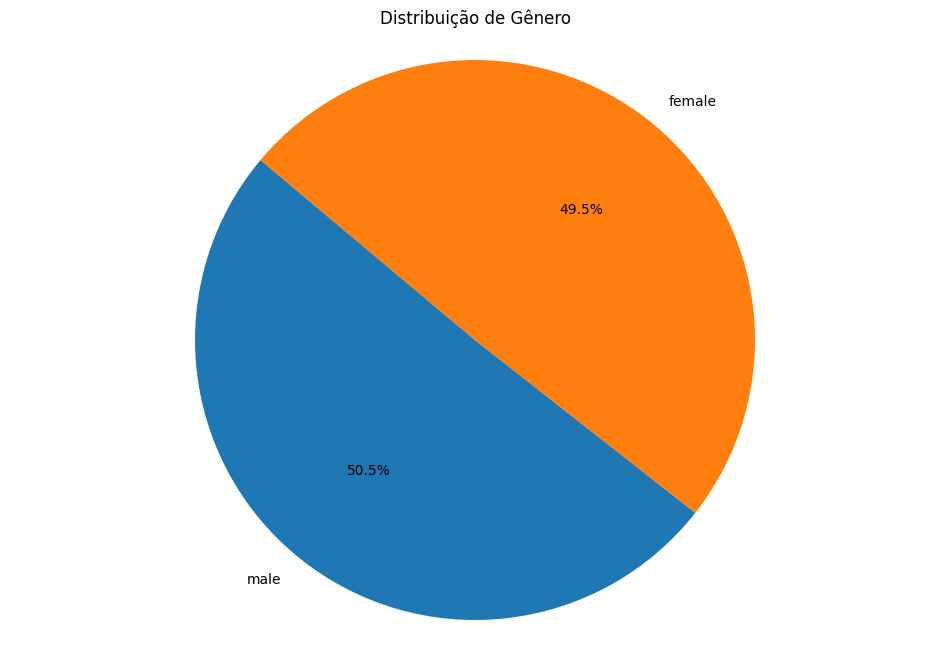

In [14]:
# Criar o gráfico de pizza
plt.figure(figsize=(12, 8))  # Define o tamanho da figura (opcional)
plt.pie(
    size, labels=labels, autopct="%1.1f%%", startangle=140
)  # Cria o gráfico de pizza com rótulos
plt.title("Distribuição de Gênero")  # Define o título do gráfico
plt.axis("equal")  # Faz com que o gráfico de pizza seja circular
plt.show()  # Mostra o gráfico

Aqui deu para notar que nossa base de dados está bem distribuida. Vamos fazer o mesmo para fumantes e não fumantes.

In [15]:
labels = ['fumantes', 'não fumantes']
size = [sum(df.smoker == 'yes'), sum(df.smoker == 'no')]


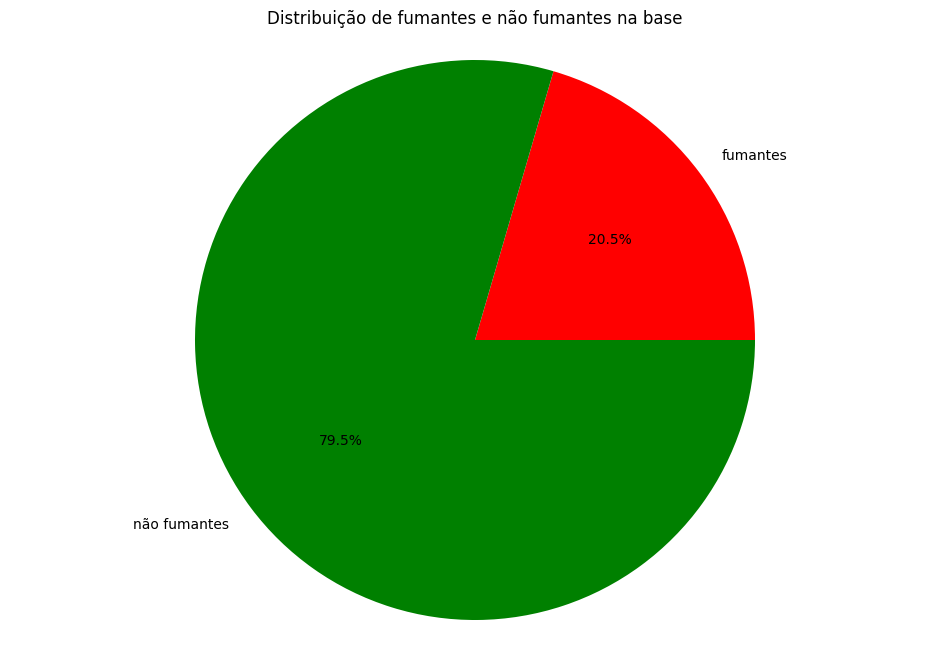

In [16]:

plt.figure(figsize=(12, 8))  
plt.pie(
    size, labels=labels, autopct="%1.1f%%", colors=['red', 'green']
) 
plt.title("Distribuição de fumantes e não fumantes na base")
plt.axis("equal")
plt.show()

Aqui notamos uma grande diferença na distribuição em não fumantes. 

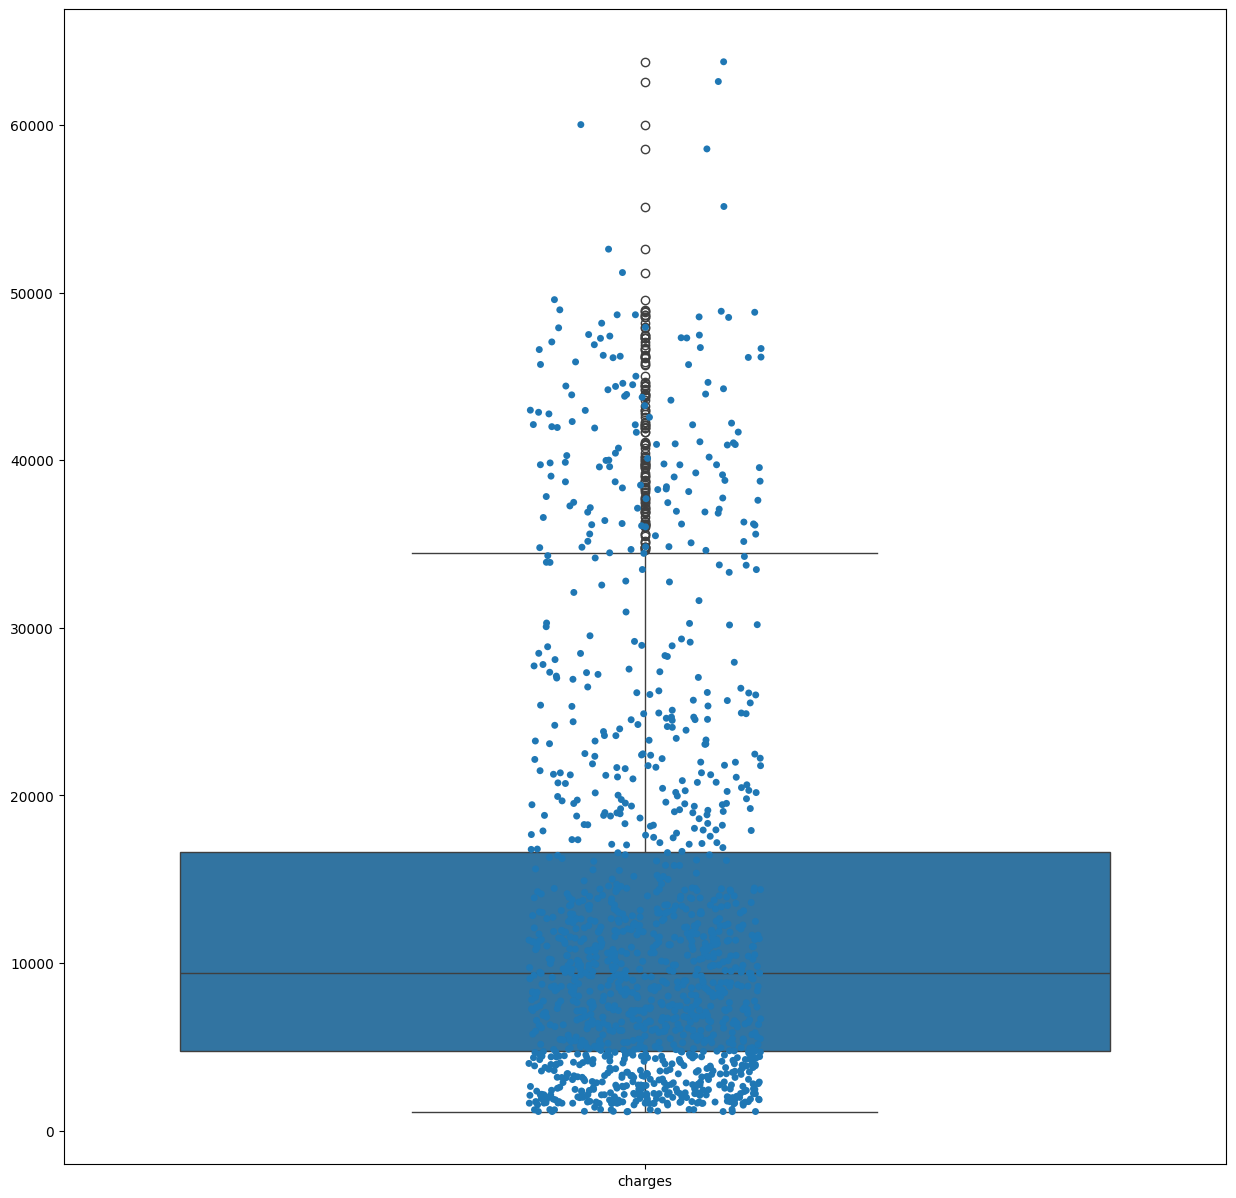

In [17]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=df_dummy[["charges"]])
sns.stripplot(data=df_dummy[["charges"]])

plt.show()

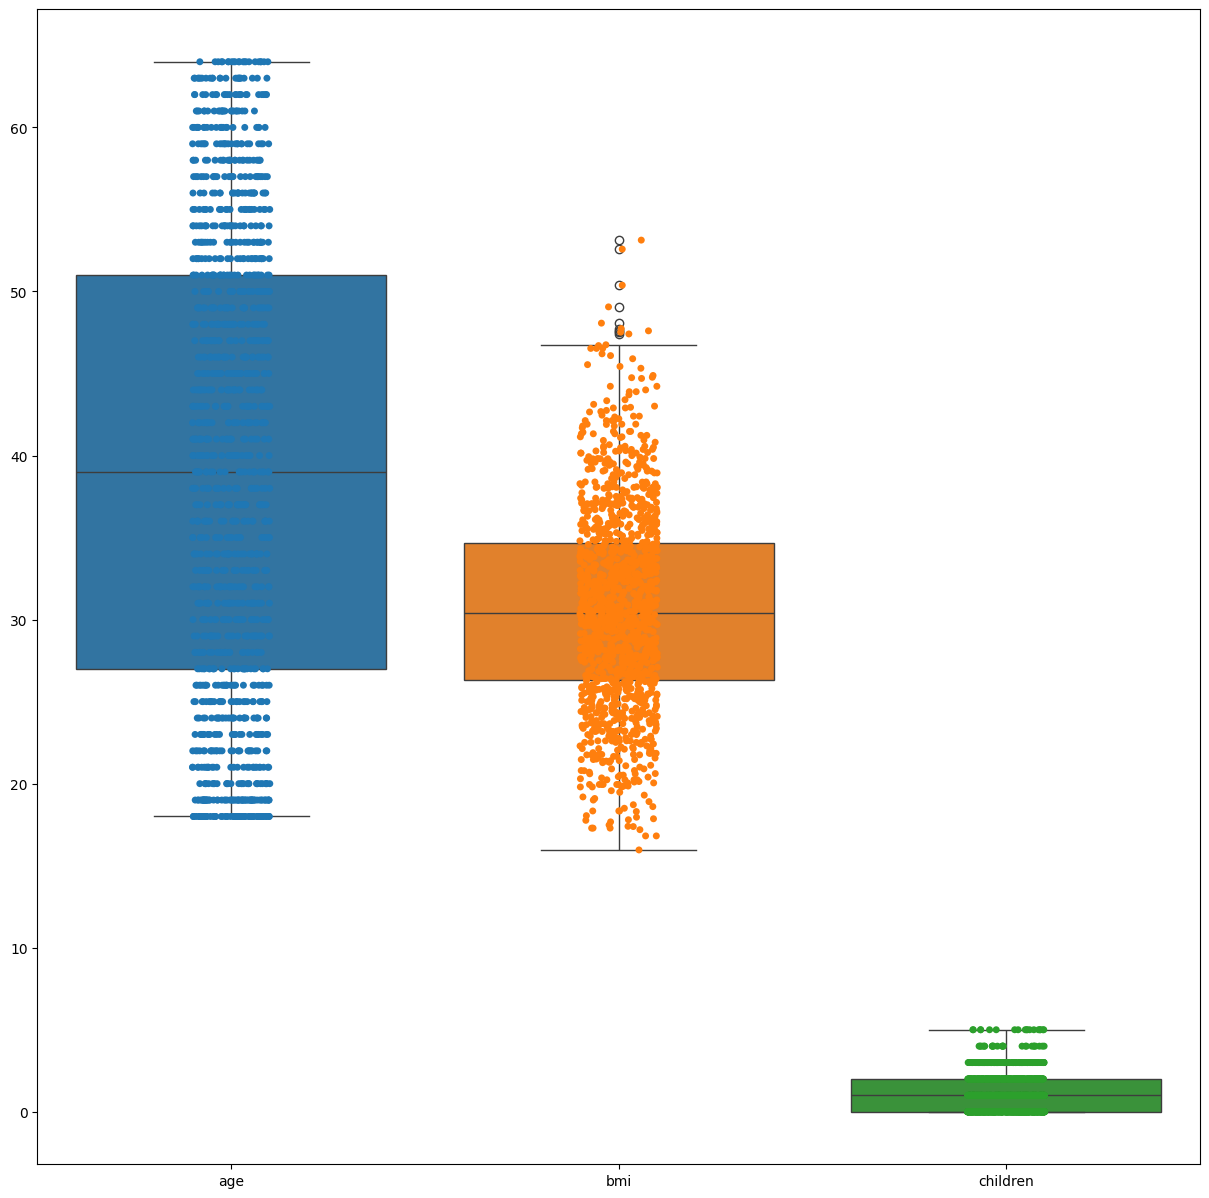

In [18]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=df_dummy[["age", "bmi", "children"]])
sns.stripplot(data=df_dummy[["age", "bmi", "children"]])

plt.show()

Aparentemente temos muito mais outliers nas variavel charges do que na bmi 

In [19]:
# Calcular estatísticas descritivas
desc = df_dummy.describe()

# Alinhar os dataframes
desc, df_dummy = desc.align(df_dummy, axis=1)

Q1 = desc.loc["25%"] ## pegar o quartil de 25% o inferior
Q3 = desc.loc["75%"] ## pegar o quartil de 75% o superior
IQR = Q3 - Q1

limit_sup = Q3 + 1.5 * IQR
limit_inf = Q1 - 1.5 * IQR

## criar um dataframe com os varoles todos acima do limite inferior e limite superior
out_liers = df_dummy[(df_dummy < limit_inf) | (df_dummy > limit_sup)]

In [20]:
out_liers.head()

,age,bmi,charges,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df_dummy[df_dummy != out_liers] ## aqui pegamos e fazemos uma mascara para transformar os valores de outliers em NaN

In [22]:
## Ai aqui vou alterar os valores de NaN para a mediana

mediana = df.bmi.median()
df.bmi.fillna(mediana, inplace=True)

In [23]:
mediana = df.charges.median()
df.charges.fillna(mediana, inplace=True)

In [24]:
df.isna().sum()

age                 0
bmi                 0
charges             0
children            0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
dtype: int64

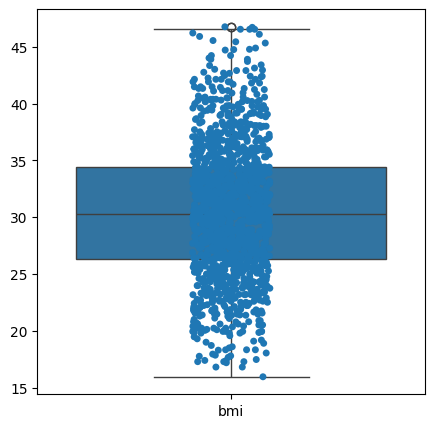

In [25]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(data=df[["bmi"]])
sns.stripplot(data=df[["bmi"]])

plt.show()

In [26]:
df.head()

,age,bmi,charges,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,16884.92400,0,False,False,False,True,True,False,False,True
1,18,33.770,1725.55230,1,False,False,True,False,False,True,True,False
2,28,33.000,4449.46200,3,False,False,True,False,False,True,True,False
3,33,22.705,21984.47061,0,False,True,False,False,False,True,True,False
4,32,28.880,3866.85520,0,False,True,False,False,False,True,True,False


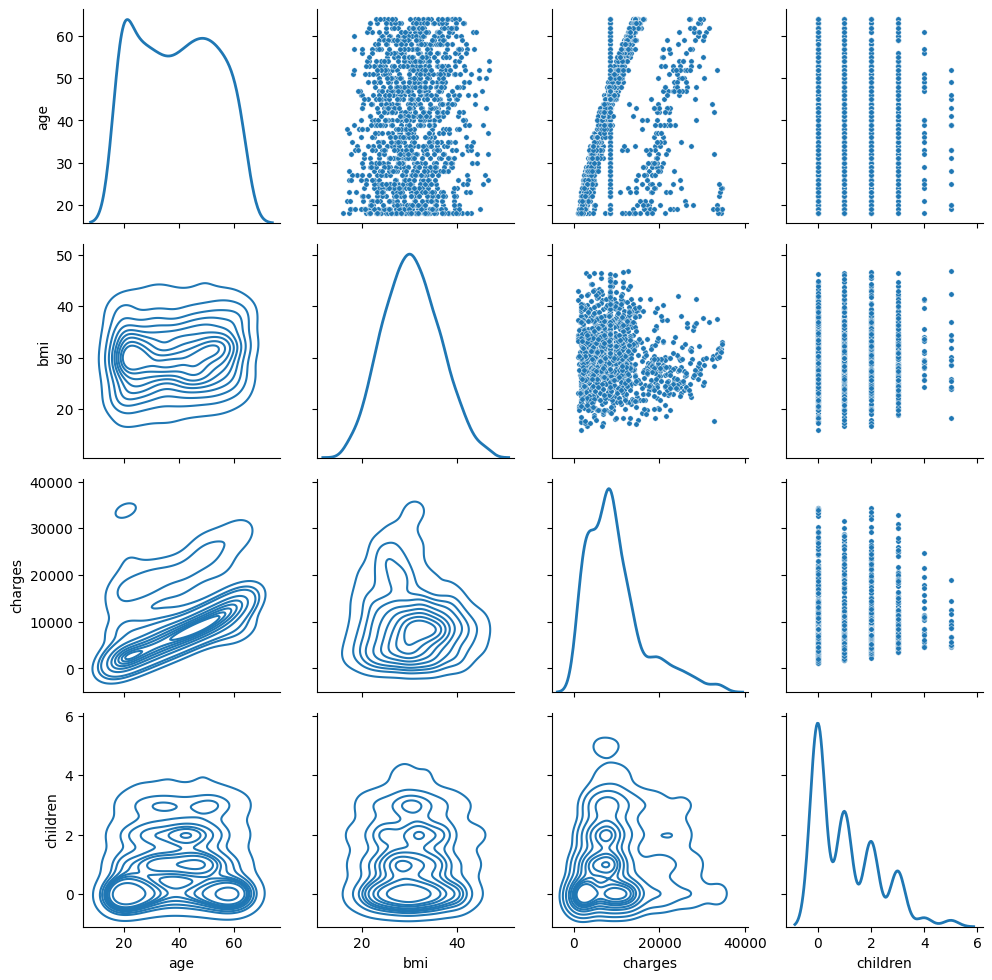

In [27]:
graph = sns.PairGrid(df[['age', 'bmi', 'charges', 'children']], diag_sharey=False)
graph.map_upper(sns.scatterplot, s=15)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot, lw=2)

Conseguimos notar que quanto maior a idade maior o gasto com medicamentos isso esta relacionado ao que aparenta ao o grafico de exponencial

In [28]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

In [29]:
m_corr = df.corr()
m_cov = np.cov(df_scale, rowvar=False)

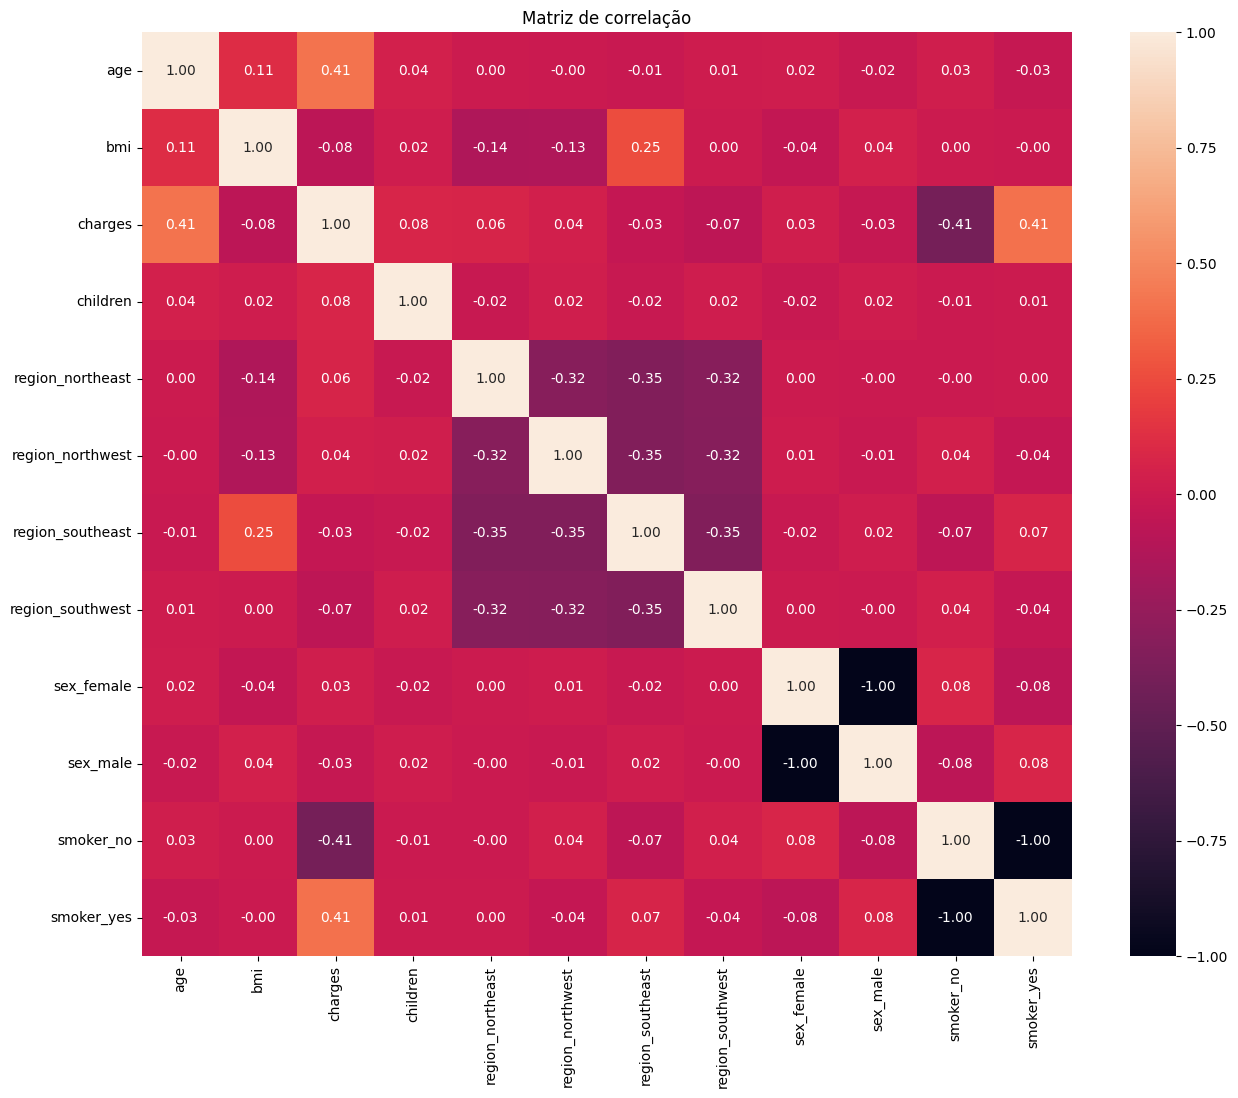

In [30]:
plt.figure(figsize=(15, 12))
plt.title("Matriz de correlação")
sns.heatmap(m_corr, annot=True, fmt=".2f")
plt.show()

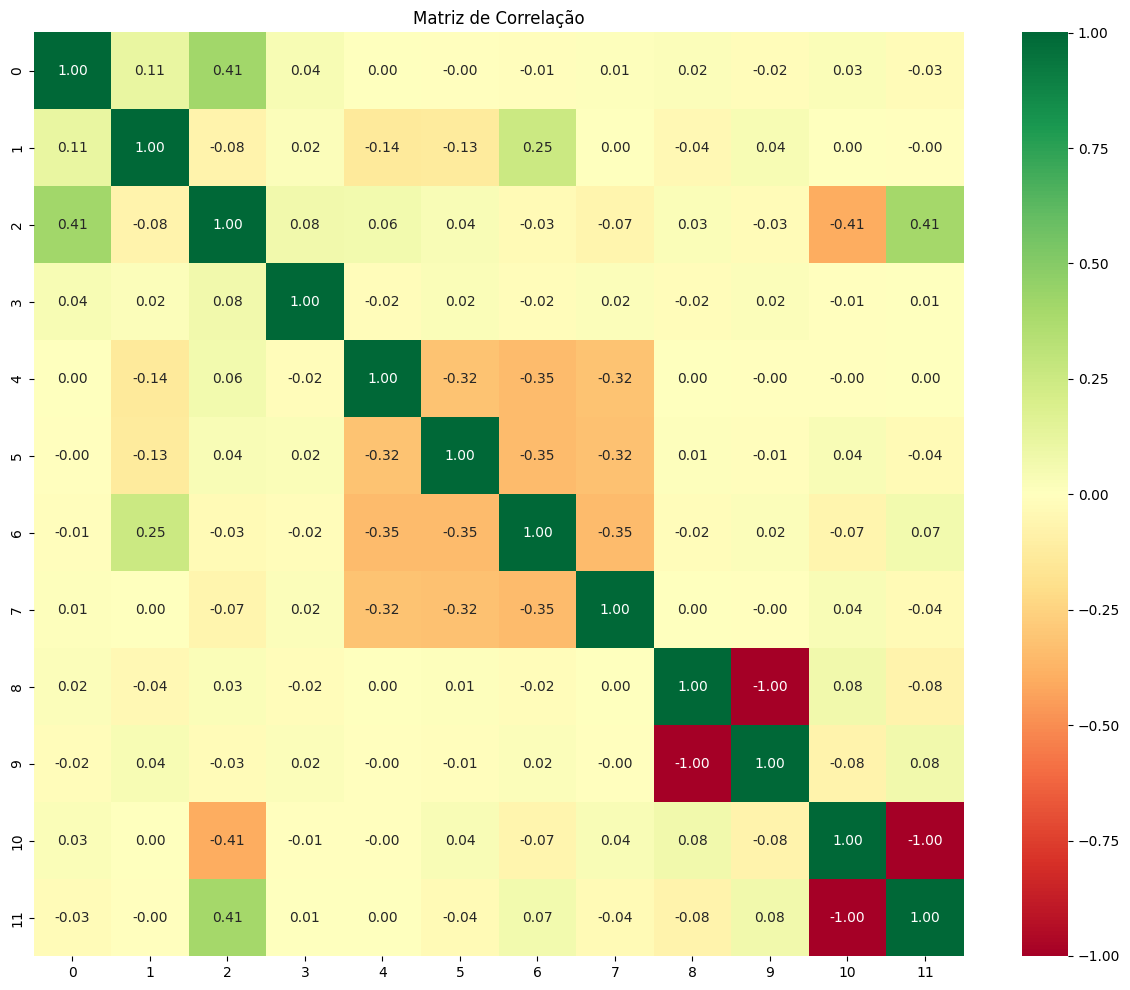

In [31]:
plt.figure(figsize=(15, 12))
sns.heatmap(m_cov, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

O que conseguimos notar da covariancia e da correlação e que elas são correlatas com fumantes e não fumantes.

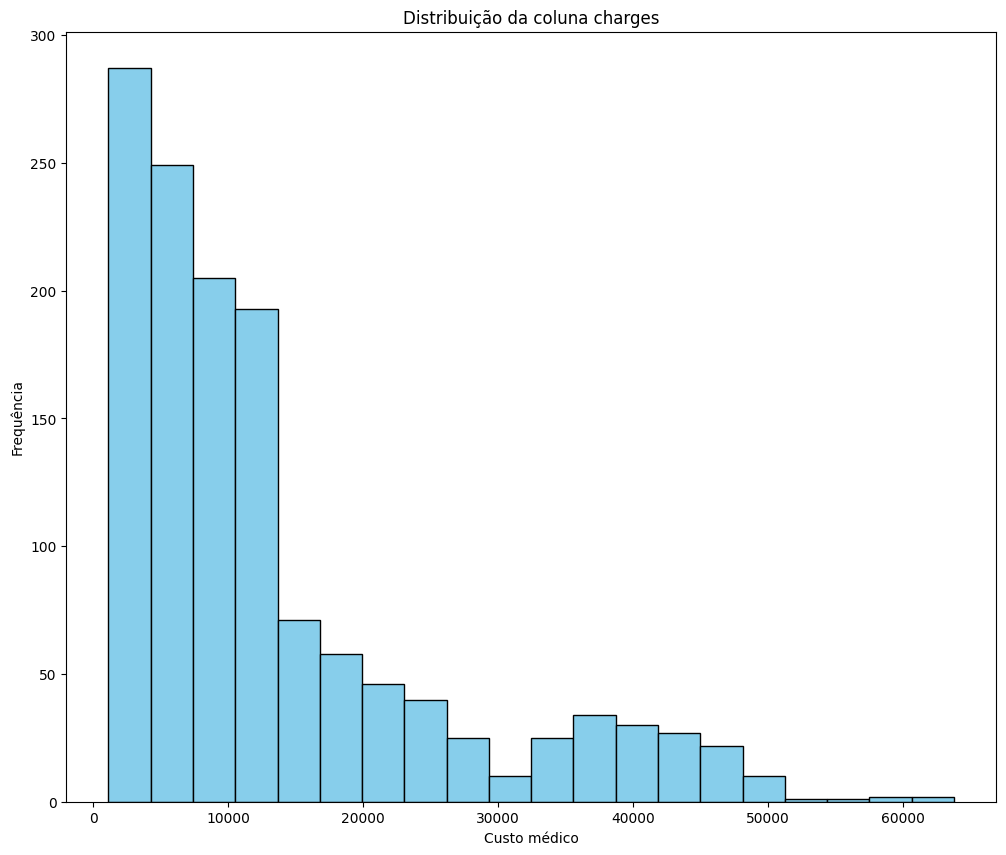

In [32]:
##
plt.figure(figsize=(12, 10))
plt.hist(df_dummy["charges"], bins=20, density=False, color="skyblue", edgecolor="black")
# Adiciona título e rótulos dos eixos
plt.title("Distribuição da coluna charges")
plt.xlabel("Custo médico")
plt.ylabel("Frequência")

# Exibe o histograma
plt.show()

Realmente a distribuição da nossa variavel y segue a gamm, assim como mostra a img abaixo.


<center>
    <img src="https://www.researchgate.net/profile/Jose-Siqueira-18/publication/326522285/figure/fig1/AS:650591076372480@1532124408587/Figura-21-Distribuicao-gama-invertida-com-2-7-ao-dia-util-e-5.png" width="400">
</center>

Analisando os pressupostos, temos uma distribuição consistente e correlações adequadas, sem valores extremamente altos. Notamos uma relação exponencial entre a idade e o custo médico, o que nos permite aplicar nosso modelo com confiança. Veremos realmente se vai ter uma grande relevância o modelo.

In [33]:
df_dummy["region_northeast"] = df_dummy["region_northeast"].astype(int)
df_dummy["region_northwest"] = df_dummy["region_northwest"].astype(int)
df_dummy["region_southeast"] = df_dummy["region_southeast"].astype(int)
df_dummy["region_southwest"] = df_dummy["region_southwest"].astype(int)
df_dummy["sex_female"] = df_dummy["sex_female"].astype(int)
df_dummy["sex_male"] = df_dummy["sex_male"].astype(int)
df_dummy["smoker_no"] = df_dummy["smoker_no"].astype(int)
df_dummy["smoker_yes"] = df_dummy["smoker_yes"].astype(int)

In [34]:
X = df_dummy.drop("charges", axis=1)
y = df[['charges']]

In [35]:
X

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,0,0,0,1,1,0,0,1
1,18,33.770,1,0,0,1,0,0,1,1,0
2,28,33.000,3,0,0,1,0,0,1,1,0
3,33,22.705,0,0,1,0,0,0,1,1,0
4,32,28.880,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,0,1,1,0
1334,18,31.920,0,1,0,0,0,1,0,1,0
1335,18,36.850,0,0,0,1,0,1,0,1,0
1336,21,25.800,0,0,0,0,1,1,0,1,0


In [36]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [37]:
y.isna().sum()

charges    0
dtype: int64

In [38]:
y.isnull().sum()

charges    0
dtype: int64

In [39]:
X.isna().sum()

age                 0
bmi                 0
children            0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = LinearRegression().fit(X[included + [new_column]], y)
            new_pval[new_column] = model.score(X[included + [new_column]], y)
        best_pval = new_pval.max()
        if best_pval > threshold_in:
            best_feature = new_pval.idxmax()
            included.append(best_feature)
            changed = True
            if verbose:
                print(
                    "Adicionado variável: {}, Score R²: {:.4f}".format(
                        best_feature, best_pval
                    )
                )
        # backward step
        model = LinearRegression().fit(X[included], y)
        p_values = model.score(X[included], y)
        worst_pval = p_values.min()
        if worst_pval < threshold_out:
            changed = True
            worst_feature = included[np.argmin(p_values)]
            included.remove(worst_feature)
            if verbose:
                print(
                    "Removido variável: {}, Score R²: {:.4f}".format(
                        worst_feature, worst_pval
                    )
                )
        if not changed:
            break
    return included

In [42]:
included = stepwise_selection(X, y)

Adicionado variável: age, Score R²: 0.1688
Adicionado variável: smoker_no, Score R²: 0.3420


Adicionado variável: bmi, Score R²: 0.3586
Adicionado variável: children, Score R²: 0.3619
Adicionado variável: region_southwest, Score R²: 0.3653
Adicionado variável: sex_male, Score R²: 0.3675
Adicionado variável: region_southeast, Score R²: 0.3696
Adicionado variável: region_northwest, Score R²: 0.3696
Adicionado variável: smoker_yes, Score R²: 0.3696
Adicionado variável: sex_female, Score R²: 0.3696
Adicionado variável: region_northeast, Score R²: 0.3696


In [43]:
included

['age',
 'smoker_no',
 'bmi',
 'children',
 'region_southwest',
 'sex_male',
 'region_southeast',
 'region_northwest',
 'smoker_yes',
 'sex_female',
 'region_northeast']

Nada diferente do esperado podemos usar todas as variaveis.

In [46]:
### interesante no modelo statsmodel e necessario alterar as variaveis boleanas em inteiras


X_train_c = sm.add_constant(X_train)


modelo1 = sm.GLM(y_train, X_train_c, family=sm.families.Gamma()).fit()

print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                   Gamma   Df Model:                            8
Link Function:           InversePower   Scale:                         0.44749
Method:                          IRLS   Log-Likelihood:                -10583.
Date:                Fri, 05 Apr 2024   Deviance:                       373.30
Time:                        15:18:53   Pearson chi2:                     475.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2836
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.582e-05    5.3e-06  

Aparentemente o modelo não expressa nosso dados por conta do Pseudo R-squ bem baixo apenas 28%, vou testar como todos os dados e treinar um segundo modelo para análisar.

In [47]:
X_train_c = sm.add_constant(X)


modelo2 = sm.GLM(y, X_train_c, family=sm.families.Gamma()).fit()

print(modelo2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                   Gamma   Df Model:                            8
Link Function:           InversePower   Scale:                         0.46274
Method:                          IRLS   Log-Likelihood:                -13223.
Date:                Fri, 05 Apr 2024   Deviance:                       468.53
Time:                        15:18:56   Pearson chi2:                     615.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2918
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.779e-05   4.87e-06  

Revendo os dois modelos não tivemos uma grande relevância de diferença no R-squ, porem temos diferença na Desviance e no Pearson chi2. Por conta disso vamos entrar mais a fundo se são bom os dois modelos.

* Scale escala do modelo temos de 0.46
* Log-Likelihood valor da log verossimilhança quanto mais proximo de zero melhor.
* Diviance desvio que quanto menor melhor.
* Pseudo R-squ medida de ajuste  do modelo. indicando a variabilidade do modelo que também indica o quanto explica nossos dados o  modelo.
* std erro padrão estimado de cada coeficiente 
* P > |z| Valor p significância de cada coeficiente

Análisando o coeficiente age do modelo indica que quanto mais ela aumenta ou seja as pessoas envelheça as suas dispesas médicas diminue

In [48]:
X

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,0,0,0,1,1,0,0,1
1,18,33.770,1,0,0,1,0,0,1,1,0
2,28,33.000,3,0,0,1,0,0,1,1,0
3,33,22.705,0,0,1,0,0,0,1,1,0
4,32,28.880,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,0,1,1,0
1334,18,31.920,0,1,0,0,0,1,0,1,0
1335,18,36.850,0,0,0,1,0,1,0,1,0
1336,21,25.800,0,0,0,0,1,1,0,1,0


In [49]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [67]:
## Aplicar a transformação logarítmica aos dados de treinamento e teste
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

## Se deseja aplicar a transformação logarítmica à variável dependente (y), use:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [68]:
X_train_scaled = sm.add_constant(X_train_scaled)


modelo1_scaled = sm.GLM(y_train_log, X_train_log, family=sm.families.Gamma()).fit()

print(modelo1_scaled.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                   Gamma   Df Model:                            8
Link Function:           InversePower   Scale:                       0.0035338
Method:                          IRLS   Log-Likelihood:                -813.56
Date:                Fri, 05 Apr 2024   Deviance:                       3.6000
Time:                        16:14:26   Pearson chi2:                     3.75
No. Iterations:                     6   Pseudo R-squ. (CS):             0.6666
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -0.0153      0.001  

Agora temos um modelo bem mais promissor por conta que fizemos a transformação de log que e extreitamente possitiva que condiz o cenário da distribuição Gamma

Vamos análisar os graficos dos residuos dos três modelos

In [70]:
resid1 = modelo1.resid_pearson
resid2 = modelo2.resid_pearson
resid_scale = modelo1_scaled.resid_pearson

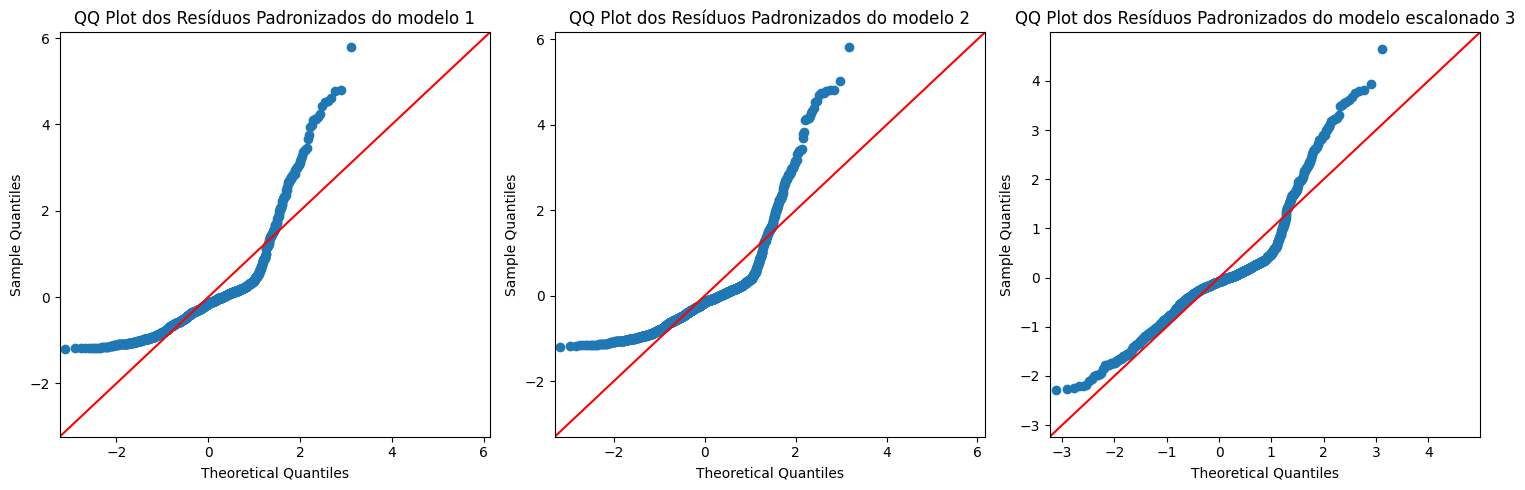

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Calcule os resíduos padronizados
residuos_padronizados1 = modelo1.resid_pearson / np.sqrt(modelo1.scale) ## aqui calculamos o risiduo divididos pela raiz do desvio padrao do residuo para ser semelhantes
residuos_padronizados2 = modelo2.resid_pearson / np.sqrt(modelo2.scale) ## isso ocorre por ser possivel que os residuos estejam na mesma escala por que sao de modelos distintos
residuos_padronizados_scaled = modelo1_scaled.resid_pearson / np.sqrt(modelo1_scaled.scale)

# Faça os QQ plots
sm.qqplot(residuos_padronizados1, line="45", ax=axes[0])
axes[0].set_title("QQ Plot dos Resíduos Padronizados do modelo 1")

sm.qqplot(residuos_padronizados2, line="45", ax=axes[1])
axes[1].set_title("QQ Plot dos Resíduos Padronizados do modelo 2")

sm.qqplot(residuos_padronizados_scaled, line="45", ax=axes[2])
axes[2].set_title("QQ Plot dos Resíduos Padronizados do modelo escalonado 3")

plt.tight_layout()
plt.show()

Aqui já no qq plot podemos notar uma grande diferença no modelo escalonado com log já no modelo 1 e modelo 2 podemos observar uma distância muito longe da nossa reta no centro em vermelho. Isso nos indica que nossos risiduos do modelo escaçonado em log podem estar seguindo uma distribuição normal.

Vamos utilizar o teste do shapiro para ver a normalidade dos nossos risiduos e compara um a um de cada modelo.

In [110]:
dict_modelos = {}
list_r = [residuos_padronizados1, residuos_padronizados2, residuos_padronizados_scaled]

alpha = 0.5
for i in range(3):
    stat, p_valor = shapiro(list_r[i])
    if (i==0):
        dict_modelos["modelo1"] = {
            "Estatistica de teste": stat,
            "Valor-p": float(p_valor),
            "H0 - H1": "Aceitar" if p_valor > alpha else "Rejeitar",
            "alpha": alpha,
        }
    elif (i == 1):
        dict_modelos["modelo2"] = {
            "Estatistica de teste": stat,
            "Valor-p": float(p_valor),
            "H0 - H1": "Aceitar" if p_valor > alpha else "Rejeitar",
            "alpha": alpha,
        }
    else:
        dict_modelos["modelo_scaled"] = {
            "Estatistica de teste": stat,
            "Valor-p": float(p_valor),
            "H0 - H1": "Aceitar" if p_valor > alpha else "Rejeitar",
            "alpha":alpha
        }

In [111]:
dict_modelos

{'modelo1': {'Estatistica de teste': 0.7842608791753185,
  'Valor-p': 2.332043404402635e-35,
  'H0 - H1': 'Rejeitar',
  'alpha': 0.5},
 'modelo2': {'Estatistica de teste': 0.7706957134188264,
  'Valor-p': 1.1548090121174995e-39,
  'H0 - H1': 'Rejeitar',
  'alpha': 0.5},
 'modelo_scaled': {'Estatistica de teste': 0.8933984172389141,
  'Valor-p': 1.4446118745597663e-26,
  'H0 - H1': 'Rejeitar',
  'alpha': 0.5}}

In [112]:
result = pd.DataFrame(dict_modelos)
result

,modelo1,modelo2,modelo_scaled
Estatistica de teste,0.784261,0.770696,0.893398
Valor-p,0.0,0.0,0.0
H0 - H1,Rejeitar,Rejeitar,Rejeitar
alpha,0.5,0.5,0.5


Ou seja elas relamente não seguem uma distribuição normal.

In [154]:
dict_new = {}
for i in range(3):
    if i == 0:
        y_pred = modelo1.predict(sm.add_constant(X_test))
        dict_new["modelo1"] = {
            "AIC": modelo1.aic,
            "BIC": modelo1.bic,
            "MSE": mean_squared_error(y_test, y_pred)
        }
    elif i == 1:
        y_pred = modelo2.predict(sm.add_constant(X))
        dict_new["modelo2"] = {
            "AIC": modelo2.aic,
            "BIC": modelo2.bic,
            "MSE": mean_squared_error(y, y_pred)
        }
    else:
        y_pred = modelo1_scaled.predict(X_test_log)
        dict_new["modelo_scaled"] = {
            "AIC": modelo1_scaled.aic,
            "BIC": modelo1_scaled.bic,
            "MSE": mean_squared_error(y_test_log, y_pred)
        }

In [158]:
dc = pd.DataFrame(dict_new)
dc

,modelo1,modelo2,modelo_scaled
AIC,2.118494e+04,2.646352e+04,1645.113757
BIC,-7.027616e+03,-9.098851e+03,-7397.314214
MSE,3.736581e+07,3.808824e+07,0.248241


In [159]:
result = pd.concat([result, dc])
result

,modelo1,modelo2,modelo_scaled
Estatistica de teste,0.784261,0.770696,0.893398
Valor-p,0.0,0.0,0.0
H0 - H1,Rejeitar,Rejeitar,Rejeitar
alpha,0.5,0.5,0.5
AIC,21184.940903,26463.515983,1645.113757
BIC,-7027.616092,-9098.851036,-7397.314214
MSE,37365808.127878,38088236.757894,0.248241


Com base nessas métricas, podemos observar que o modelo escalonado obteve um desempenho significativamente superior. Tanto a estatística de teste, que é maior, quanto o MSE, que foi muito mais próximo de zero, indicam uma melhor adequação do modelo aos dados. Com isso, podemos considerar enviar o modelo escalonado para homologação e começar a ajustar seus hiperparâmetros para possíveis melhorias adicionais.

------